In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as data

In [2]:
df=pd.read_csv('Small_Data.csv')
df.head()

Date       Open       High        Low      Close  Adj Close  \
0  2017-01-03  28.950001  29.082500  28.690001  29.037500  27.297688   
1  2017-01-04  28.962500  29.127501  28.937500  29.004999  27.267139   
2  2017-01-05  28.980000  29.215000  28.952499  29.152500  27.405802   
3  2017-01-06  29.195000  29.540001  29.117500  29.477501  27.711330   
4  2017-01-09  29.487499  29.857500  29.485001  29.747499  27.965155   

      Volume  
0  115127600  
1   84472400  
2   88774400  
3  127007600  
4  134247600

In [3]:
df.tail()

Date        Open        High         Low       Close   Adj Close  \
1021  2021-01-25  143.070007  145.089996  136.539993  142.919998  141.863586   
1022  2021-01-26  143.600006  144.300003  141.369995  143.160004  142.101807   
1023  2021-01-27  143.429993  144.300003  140.410004  142.059998  141.009933   
1024  2021-01-28  139.520004  141.990005  136.699997  137.089996  136.076660   
1025  2021-01-29  135.830002  136.740005  130.210007  131.960007  130.984604   

         Volume  
1021  157611700  
1022   98390600  
1023  140843800  
1024  142621100  
1025  177523800

In [4]:
df.shape

(1026, 7)

In [5]:
# df=df.reset_index()
df.head()

Date       Open       High        Low      Close  Adj Close  \
0  2017-01-03  28.950001  29.082500  28.690001  29.037500  27.297688   
1  2017-01-04  28.962500  29.127501  28.937500  29.004999  27.267139   
2  2017-01-05  28.980000  29.215000  28.952499  29.152500  27.405802   
3  2017-01-06  29.195000  29.540001  29.117500  29.477501  27.711330   
4  2017-01-09  29.487499  29.857500  29.485001  29.747499  27.965155   

      Volume  
0  115127600  
1   84472400  
2   88774400  
3  127007600  
4  134247600

In [6]:
df=df.drop(['Date','Adj Close'],axis=1)

In [7]:
df

Open        High         Low       Close     Volume
0      28.950001   29.082500   28.690001   29.037500  115127600
1      28.962500   29.127501   28.937500   29.004999   84472400
2      28.980000   29.215000   28.952499   29.152500   88774400
3      29.195000   29.540001   29.117500   29.477501  127007600
4      29.487499   29.857500   29.485001   29.747499  134247600
...          ...         ...         ...         ...        ...
1021  143.070007  145.089996  136.539993  142.919998  157611700
1022  143.600006  144.300003  141.369995  143.160004   98390600
1023  143.429993  144.300003  140.410004  142.059998  140843800
1024  139.520004  141.990005  136.699997  137.089996  142621100
1025  135.830002  136.740005  130.210007  131.960007  177523800

[1026 rows x 5 columns]

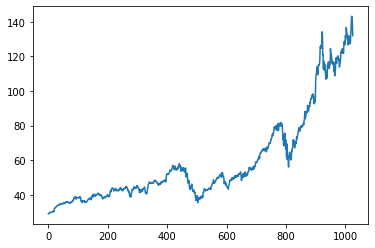

In [8]:
plt.plot(df.Close)

In [9]:
df.describe()



Open         High          Low        Close        Volume
count  1026.000000  1026.000000  1026.000000  1026.000000  1.026000e+03
mean     59.487868    60.162539    58.839927    59.532960  1.284194e+08
std      27.046902    27.488987    26.531944    27.021594  5.823097e+07
min      28.950001    29.082500    28.690001    29.004999  4.544800e+07
25%      41.546250    42.132500    41.148749    41.622500  8.862690e+07
50%      48.593750    49.041250    48.126249    48.539999  1.123597e+08
75%      69.044375    70.143127    67.906871    68.839998  1.501353e+08
max     143.600006   145.089996   141.369995   143.160004  4.479400e+08

In [10]:
ma100 = df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
1021    120.8906
1022    120.9804
1023    121.0870
1024    121.2491
1025    121.3591
Name: Close, Length: 1026, dtype: float64

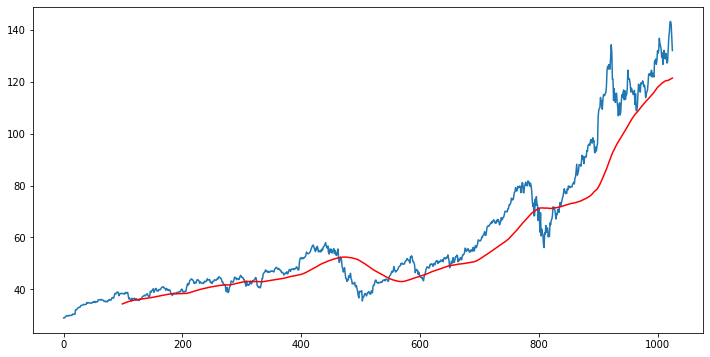

In [11]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [12]:
ma200 = df.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
1021    105.789487
1022    106.170300
1023    106.539037
1024    106.865675
1025    107.169937
Name: Close, Length: 1026, dtype: float64

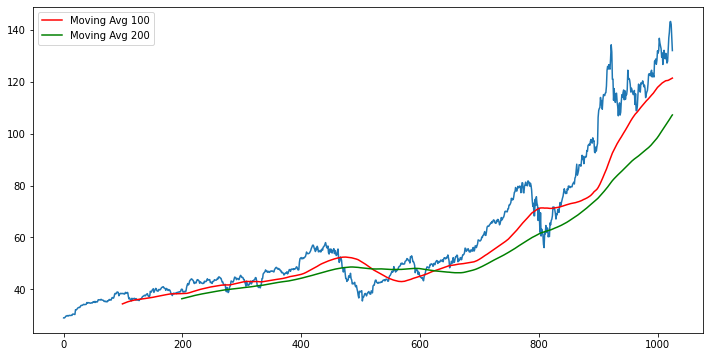

In [13]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r', label='Moving Avg 100')
plt.plot(ma200,'g',label='Moving Avg 200')
plt.legend()

In [14]:
##Spliting of data
data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])


In [15]:
data_training.shape,data_testing.shape

((718, 1), (308, 1))

In [16]:
data_training

Close
0    29.037500
1    29.004999
2    29.152500
3    29.477501
4    29.747499
..         ...
713  63.955002
714  64.375000
715  64.282501
716  64.309998
717  64.857498

[718 rows x 1 columns]

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [18]:
data_training_array=scaler.fit_transform(data_training)
data_training_array

array([[9.06519794e-04],
       [0.00000000e+00],
       [4.11410652e-03],
       [1.31790534e-02],
       [2.07098534e-02],
       [2.15466431e-02],
       [2.60093725e-02],
       [2.25228651e-02],
       [2.10585321e-02],
       [2.77526261e-02],
       [2.76828681e-02],
       [2.62185629e-02],
       [2.77526261e-02],
       [2.83104673e-02],
       [2.75434357e-02],
       [4.08618657e-02],
       [4.12803024e-02],
       [4.13499767e-02],
       [3.91186121e-02],
       [3.71661959e-02],
       [8.87665041e-02],
       [8.72324409e-02],
       [9.10675989e-02],
       [9.95048909e-02],
       [1.08151485e-01],
       [1.11707666e-01],
       [1.14357468e-01],
       [1.12265536e-01],
       [1.20423935e-01],
       [1.32487334e-01],
       [1.35904055e-01],
       [1.34788456e-01],
       [1.37368416e-01],
       [1.44201943e-01],
       [1.47060906e-01],
       [1.43016558e-01],
       [1.43923078e-01],
       [1.45805708e-01],
       [1.46224173e-01],
       [1.65748530e-01],


In [19]:
x_train=[]
y_train=[]

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])

x_train, y_train = np.array(x_train),np.array(y_train)

In [20]:
x_train,y_train


(array([[[9.06519794e-04],
         [0.00000000e+00],
         [4.11410652e-03],
         ...,
         [2.63440548e-01],
         [2.60232906e-01],
         [2.63928604e-01]],
 
        [[0.00000000e+00],
         [4.11410652e-03],
         [1.31790534e-02],
         ...,
         [2.60232906e-01],
         [2.63928604e-01],
         [2.62115648e-01]],
 
        [[4.11410652e-03],
         [1.31790534e-02],
         [2.07098534e-02],
         ...,
         [2.63928604e-01],
         [2.62115648e-01],
         [2.62534029e-01]],
 
        ...,
 
        [[5.34969738e-01],
         [5.42988677e-01],
         [5.74785596e-01],
         ...,
         [9.25597962e-01],
         [9.74827529e-01],
         [9.86542138e-01]],
 
        [[5.42988677e-01],
         [5.74785596e-01],
         [5.70741247e-01],
         ...,
         [9.74827529e-01],
         [9.86542138e-01],
         [9.83962150e-01]],
 
        [[5.74785596e-01],
         [5.70741247e-01],
         [5.81828424e-01],
         

In [21]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [22]:
model = Sequential()
model.add(LSTM(units = 50, activation='relu', return_sequences= True,
              input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation='relu', return_sequences= True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation='relu', return_sequences= True))
model.add(Dropout(0.4))
 
    
model.add(LSTM(units = 120, activation='relu' ))
model.add(Dropout(0.5 ))


model.add(Dense(units=1))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [24]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
20/20 [==============================] - 153s 526ms/step - loss: 0.1164
Epoch 2/50
20/20 [==============================] - 10s 490ms/step - loss: 0.0295
Epoch 3/50
20/20 [==============================] - 10s 477ms/step - loss: 0.0201
Epoch 4/50
20/20 [==============================] - 10s 507ms/step - loss: 0.0147
Epoch 5/50
20/20 [==============================] - 10s 482ms/step - loss: 0.0113
Epoch 6/50
20/20 [==============================] - 11s 534ms/step - loss: 0.0127
Epoch 7/50
20/20 [==============================] - 11s 537ms/step - loss: 0.0116
Epoch 8/50
20/20 [==============================] - 10s 493ms/step - loss: 0.0102
Epoch 9/50
20/20 [==============================] - 10s 493ms/step - loss: 0.0097
Epoch 10/50
20/20 [==============================] - 8s 414ms/step - loss: 0.0104
Epoch 11/50
20/20 [==============================] - 8s 411ms/step - loss: 0.0112
Epoch 12/50
20/20 [==============================] - 10s 505ms/step - loss: 0.0094
Epoch 13/50
20

In [25]:
#  model.save('keras_model.h5')

In [26]:
 data_testing.head()

Close
718  65.035004
719  65.550003
720  65.489998
721  66.117500
722  65.660004

In [27]:
## for predicting 1938th row closing price we need its upper 100 rows
## so we append it from training data


In [28]:
past_100_days=data_training.tail(100)

In [29]:
final_df=past_100_days.append(data_testing,ignore_index=True)

In [30]:
final_df

Close
0     49.467499
1     49.865002
2     49.695000
3     49.645000
4     48.892502
..          ...
403  142.919998
404  143.160004
405  142.059998
406  137.089996
407  131.960007

[408 rows x 1 columns]

In [31]:
input_data=scaler.fit_transform(final_df)

In [32]:
input_data

array([[0.01194305],
       [0.01613502],
       [0.01434222],
       [0.01381493],
       [0.00587928],
       [0.01703139],
       [0.01687321],
       [0.01207488],
       [0.02164516],
       [0.02475613],
       [0.02918536],
       [0.02871078],
       [0.01761141],
       [0.02082786],
       [0.02607435],
       [0.02217243],
       [0.02625892],
       [0.03129452],
       [0.02942263],
       [0.02639075],
       [0.03248091],
       [0.02438703],
       [0.03659373],
       [0.04086475],
       [0.04041657],
       [0.03606646],
       [0.03796469],
       [0.04307934],
       [0.04070657],
       [0.05193777],
       [0.0397838 ],
       [0.02815715],
       [0.        ],
       [0.00964936],
       [0.01502767],
       [0.02660162],
       [0.02016875],
       [0.01882415],
       [0.0412075 ],
       [0.02480887],
       [0.02214608],
       [0.0346955 ],
       [0.0448458 ],
       [0.04487214],
       [0.05088321],
       [0.05040868],
       [0.02451886],
       [0.034

In [33]:
input_data.shape

(408, 1)

In [34]:
x_test=[]
y_test=[]

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [35]:
x_test,y_test=np.array(x_test),np.array(y_test)

In [36]:
print(x_test.shape,y_test.shape)

(308, 100, 1) (308,)


In [37]:
y_predicted=model.predict(x_test)

In [38]:
y_predicted.shape

(308, 1)

In [39]:
y_test

array([0.17611394, 0.18154498, 0.18091219, 0.18752966, 0.18270503,
       0.19093068, 0.19446351, 0.19232799, 0.18415503, 0.18104405,
       0.18043765, 0.19253888, 0.18705512, 0.19641444, 0.19485895,
       0.18671238, 0.17429479, 0.18033217, 0.19045607, 0.203981  ,
       0.19398896, 0.1981018 , 0.20413917, 0.20595832, 0.21568677,
       0.22810436, 0.22955445, 0.22778801, 0.2285262 , 0.22699711,
       0.23901924, 0.23973105, 0.25460059, 0.25431054, 0.25884521,
       0.26446082, 0.28212498, 0.27442655, 0.28067489, 0.27695759,
       0.28961245, 0.30659109, 0.30843656, 0.32591613, 0.31463219,
       0.31109938, 0.32138146, 0.33058268, 0.32488797, 0.32786715,
       0.33190089, 0.32947533, 0.30479834, 0.32784076, 0.34537304,
       0.34413391, 0.30627473, 0.30403375, 0.33089904, 0.33775378,
       0.34766673, 0.33401001, 0.33801736, 0.33290267, 0.35291328,
       0.34677035, 0.34698131, 0.33129448, 0.3434748 , 0.33472182,
       0.31560766, 0.27640388, 0.24977587, 0.26182439, 0.21138

In [40]:
y_predicted

array([[0.24876878],
       [0.24882948],
       [0.24889478],
       [0.24896319],
       [0.24903414],
       [0.24910592],
       [0.24917847],
       [0.24925347],
       [0.24933116],
       [0.24940929],
       [0.24948391],
       [0.24955133],
       [0.24961263],
       [0.24966806],
       [0.24972065],
       [0.24977243],
       [0.24982193],
       [0.24986444],
       [0.24989702],
       [0.24992138],
       [0.24994448],
       [0.24996924],
       [0.2499978 ],
       [0.25003278],
       [0.25007617],
       [0.25013644],
       [0.2502424 ],
       [0.25042662],
       [0.25071084],
       [0.25111082],
       [0.25161892],
       [0.25225806],
       [0.25303757],
       [0.25404572],
       [0.25534835],
       [0.2570039 ],
       [0.25907585],
       [0.26178432],
       [0.26515234],
       [0.26909882],
       [0.27339154],
       [0.27791268],
       [0.28280306],
       [0.28814924],
       [0.29416126],
       [0.30066866],
       [0.3072493 ],
       [0.313

In [41]:
##again scale up predicted and test data
## find scale 
scaler.scale_

array([0.01054574])

In [42]:
scale_factor=1/0.00682769
y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor

In [43]:
y_predicted

array([[ 36.435276],
       [ 36.444168],
       [ 36.45373 ],
       [ 36.463753],
       [ 36.47414 ],
       [ 36.484653],
       [ 36.49528 ],
       [ 36.506264],
       [ 36.517643],
       [ 36.529087],
       [ 36.540016],
       [ 36.549892],
       [ 36.55887 ],
       [ 36.566986],
       [ 36.574688],
       [ 36.582275],
       [ 36.589523],
       [ 36.59575 ],
       [ 36.60052 ],
       [ 36.60409 ],
       [ 36.60747 ],
       [ 36.6111  ],
       [ 36.61528 ],
       [ 36.620407],
       [ 36.626762],
       [ 36.635586],
       [ 36.651108],
       [ 36.67809 ],
       [ 36.719715],
       [ 36.778297],
       [ 36.852715],
       [ 36.946327],
       [ 37.060493],
       [ 37.208153],
       [ 37.398937],
       [ 37.641415],
       [ 37.944874],
       [ 38.341564],
       [ 38.83485 ],
       [ 39.412865],
       [ 40.041588],
       [ 40.703762],
       [ 41.42002 ],
       [ 42.203033],
       [ 43.08357 ],
       [ 44.03666 ],
       [ 45.000477],
       [ 45.9

In [44]:
y_test

array([ 25.79407347,  26.58951766,  26.49683665,  27.4660479 ,
        26.75942024,  27.96416992,  28.48159579,  28.16882343,
        26.97179189,  26.51614976,  26.42733477,  28.1997099 ,
        27.39654602,  28.7673338 ,  28.53951351,  27.34634644,
        25.52763621,  26.41188613,  27.89465723,  29.87555035,
        28.41209237,  29.01446875,  29.89871713,  30.16515438,
        31.59000622,  33.40871644,  33.62110046,  33.36238289,
        33.47050018,  33.24654591,  35.00733688,  35.11158969,
        37.28941819,  37.24693675,  37.91109533,  38.73357233,
        41.32070785,  40.19317665,  41.10832384,  40.56387907,
        42.41734024,  44.90407353,  45.17436444,  47.73446563,
        46.08179195,  45.56436763,  47.07030705,  48.41793886,
        47.58387771,  48.02021599,  48.61100822,  48.25575443,
        44.64150229,  48.01635152,  50.58417084,  50.40268565,
        44.85773843,  44.52951898,  48.46427397,  49.46823615,
        50.92010997,  48.91991455,  49.50684076,  48.75

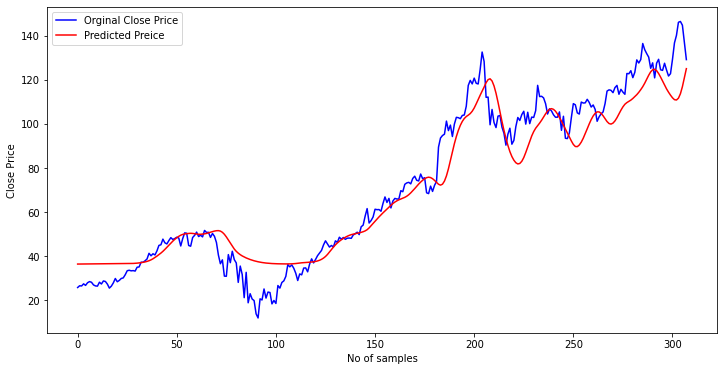

In [50]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Orginal Close Price')
plt.plot(y_predicted,'r',label='Predicted Preice')
plt.xlabel('No of samples')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [46]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2s
from math import sqrt

In [47]:
mean_abs_error=mae(y_test,y_predicted)
mean_squ_error=mse(y_test,y_predicted)
print(mean_abs_error)
print(mean_squ_error)

7.655808630237634
102.79605724525528


In [48]:
root_mean_squ_error=sqrt(mean_squ_error)
print(root_mean_squ_error)

10.138839048197545


In [49]:
r2_score=r2s(y_test,y_predicted)
print(r2_score)

0.9239830703329002
